In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn.metrics as skmetrics
from tqdm import tqdm

In [2]:
data = pd.read_csv('train-6.csv')

In [3]:
data['Datetime'] = pd.to_datetime(data['Datetime'])#, format='%Y-%m-%d')
# monthly
davg_df2 = data.groupby(pd.Grouper(freq='D', key='Datetime')).sum()
# daily
#davg_df2 = df2.groupby(pd.Grouper(freq='D', key='DATE')).mean()

In [4]:
davg_df2

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,27100.543546,1889.134802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18540.750000,5479.116889,0.000000,0.0,18540.750000,389.520971
2018-01-02 00:00:00+00:00,48105.276969,2637.182675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24395.398701,9729.795208,0.000000,0.0,24395.398701,560.634808
2018-01-03 00:00:00+00:00,44078.521927,2364.798205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25486.852534,8887.900759,0.000000,0.0,25486.852534,513.636809
2018-01-04 00:00:00+00:00,50683.449963,3412.991486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36124.574860,10187.405099,0.000000,0.0,36124.574860,698.014246
2018-01-05 00:00:00+00:00,30986.319719,2282.960836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26573.209632,6243.516355,0.000000,0.0,26573.209632,476.776755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 00:00:00+00:00,45696.346270,2771.070737,4317.797164,47.322351,91.532186,91.532186,6282.462549,5578.261070,113975.715460,6658.082134,6583.111115,3786.282164,3915.646534,18005.471176,7041.575632,1021.255596,199.0,18005.471176,527.785900
2020-03-12 00:00:00+00:00,51328.398473,2618.471958,4002.889522,108.627902,146.635433,146.635433,5764.619311,5057.506816,109587.434617,6300.777176,6235.968838,3598.081879,3668.196549,16269.592499,7563.658841,983.849657,183.0,16269.592499,512.413426
2020-03-13 00:00:00+00:00,83651.039923,4061.901962,6196.936487,292.801991,352.319696,352.319696,8822.007724,7784.561052,163884.515434,9820.688943,9733.088721,5340.935419,5616.065125,25328.966595,13458.586248,1469.395847,278.0,25328.966595,778.317955


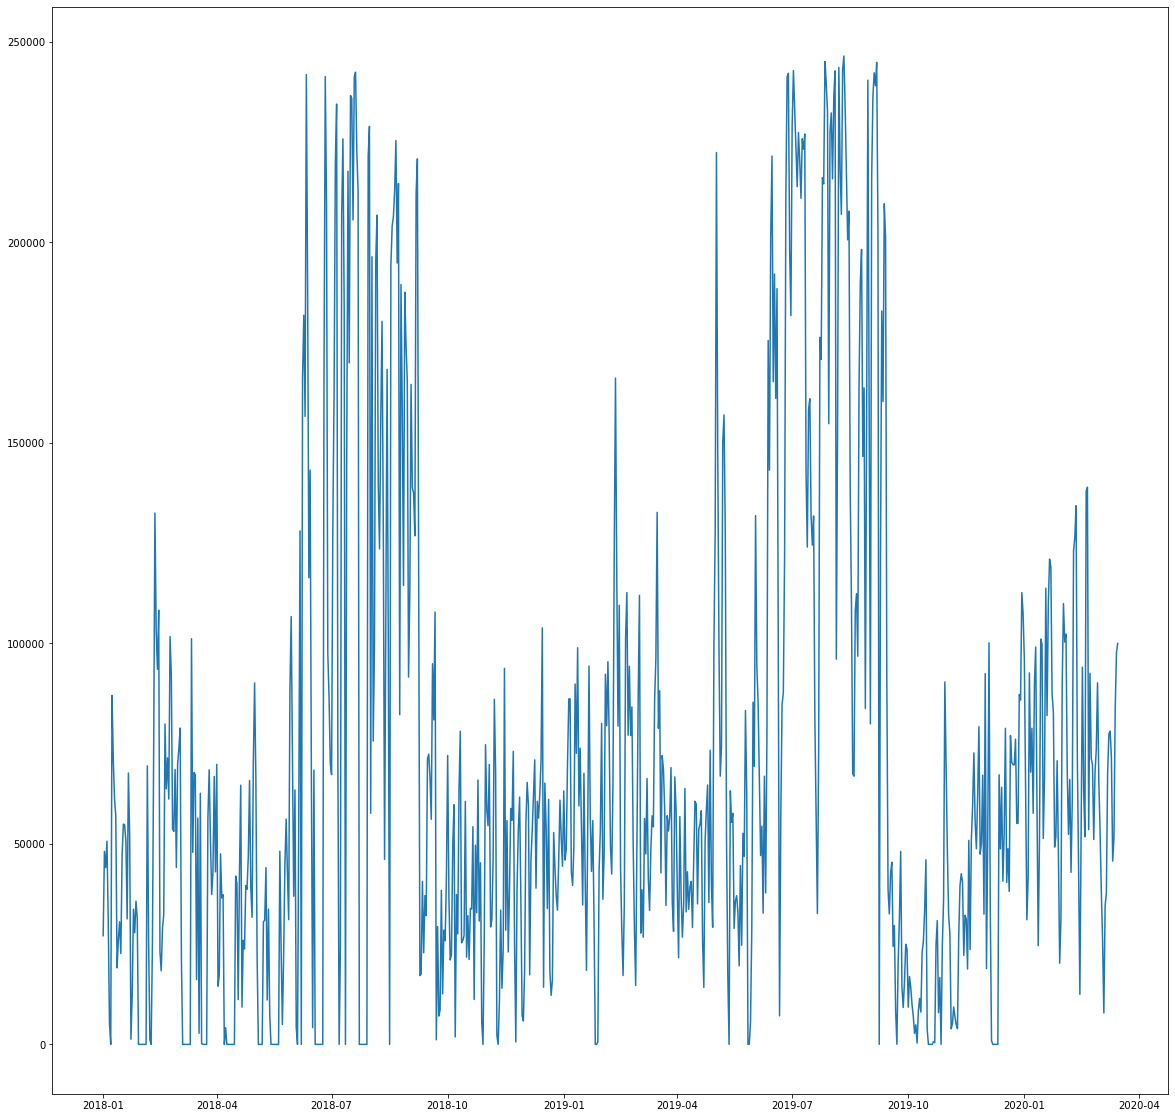

In [5]:
fig, ax = plt.subplots(figsize = (20,20))
plt.plot(davg_df2['ActivePower'])

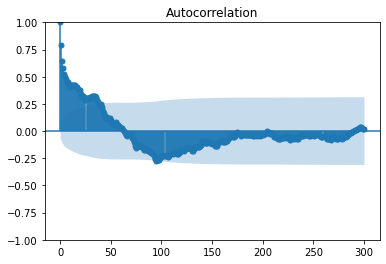

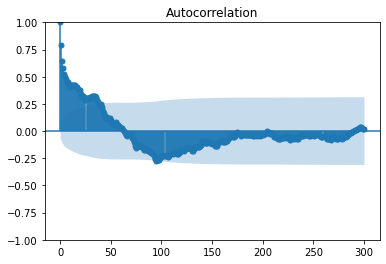

In [6]:
plot_acf(davg_df2['ActivePower'], lags=300)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


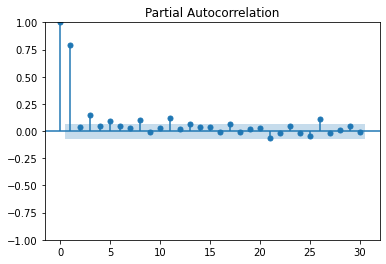

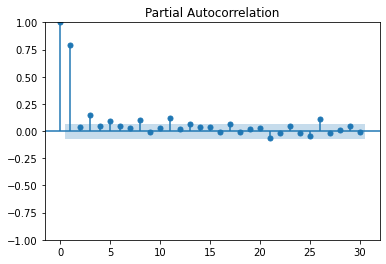

In [7]:
plot_pacf(davg_df2['ActivePower'], lags=30)

# train test split

In [8]:
train = davg_df2['ActivePower'][:655]
test = davg_df2['ActivePower'][655:]

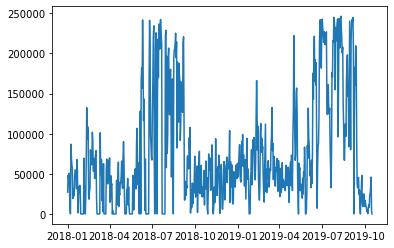

In [9]:
plt.plot(train)

In [ ]:
def evaluate_arima_model_rmse(X, arima_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    rmses = list()
    for t in tqdm(range(0, len(test), stepSize)):
        model = ARIMA(X[:train_size+t], order=arima_order) #each step: rolling one step forward to update the train set
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_squared_error(yhat, test[t:t+prediction_Size])
        rmse = np.sqrt(mse)
        rmses.append(rmse) #store prediction
        # calculate out of sample error
    re = np.mean(rmses)
    return re

def evaluate_models_rmse(dataset, p_values, d_values, q_values):
    result = []
    best_rmse, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                
                rmse= evaluate_arima_model_rmse(dataset, order, 145/195, 5, 5)
                result.append((order, rmse))
                if rmse < best_rmse:
                    best_rmse, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))
    #return result

In [ ]:
def evaluate_sarima_model_mae(X, trend_order, seasonal_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    rmses = list()
    for t in range(0, len(test), stepSize):#tqdm(range(0, len(test), stepSize)):
        model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=trend_order, seasonal_order=seasonal_order, initialization='approximate_diffuse')
        model_fit = model.fit()
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_absolute_error(yhat, test[t:t+prediction_Size])
        rmse = np.sqrt(mse)
        rmses.append(rmse) #store prediction
        # calculate out of sample error
    re = np.mean(rmses)
    return re

def evaluate_models_rmse(dataset, p_values, d_values, q_values, P_values, Q_values, D_values, m):
    result = []
    best_rmse, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            trend_order = (p,d,q)
                            seasonal_order = (P,D,Q,m)
                            cfg = [(p,d,q), (P,D,Q,m)]
                            rmse= evaluate_sarima_model_mae(dataset, trend_order, seasonal_order, train_size_coe, stepSize, prediction_Size)
                            result.append((trend_order, seasonal_order, rmse))
                if rmse < best_rmse:
                    best_rmse, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))

In [10]:
def evaluate_sarima_model_rmse(X, trend_order, seasonal_order, train_size_coe, stepSize, prediction_Size):
    train_size = int(len(X) * train_size_coe)
    train, test = X[0:train_size], X[train_size:] #initial split of train and test
    
    mses = list()
    for t in tqdm(range(0, len(test) - prediction_Size, stepSize)):#range(0, len(test), stepSize):#tqdm(range(0, len(test), stepSize)):
        #print(t)
        model = sm.tsa.statespace.SARIMAX(X[:train_size+t], order=trend_order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        yhat = np.asanyarray(model_fit.forecast(steps=prediction_Size)) #predict one step
        mse = mean_squared_error(yhat, test[t:t+prediction_Size])
        rmse = np.sqrt(mse)
        mses.append(mse) #store prediction
        #calculate out of sample error
    re = np.mean(mses)
    return re

def evaluate_models_rmse(dataset, trend_seasonal, m):
    result = []
    best_rmse, best_cfg = float("inf"), None
    # for p in p_values:
    #     for d in d_values:
    #         for q in q_values:
    #             for P in P_values:
    #                 for D in D_values:
    #                     for Q in Q_values:
    for tc in trend_seasonal:
        trend_order = tc[0]
        seasonal_order = tc[1]
        cfg = tc
        rmse= evaluate_sarima_model_rmse(dataset, trend_order, seasonal_order, 565/655, 15, 15)
        result.append((cfg, rmse))
        if rmse < best_rmse:
            best_rmse, best_cfg = rmse, cfg
        #print('ARIMA%s RMSE=%.3f' % (cfg,rmse))
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))

In [11]:
len(train)-6*15

565

In [12]:
trend_seasonal = [[(1,0,0), (1,1,1, 365)], [(1,0,1), (1,1,1,365)], [(1,1,1), (1,1,1,365)], [(2,0,0), (1,1,1,365)], [(2,0,1), (1,1,1,365)], [(2,1,1), (1,1,1,365)]
                 , [(2,0,0), (1,0,1,365)], [(2,0,1), (1,0,1,365)], [(2,1,1), (1,0,1,365)], [(2,0,0), (2,0,2,365)], [(2,0,1), (2,0,2,365)], [(2,1,1), (2,0,2,365)]]
evaluate_models_rmse(train, trend_seasonal, 365)

  0%|                                                     | 0/5 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
  0%|                                                     | 0/5 [01:22<?, ?it/s]


KeyboardInterrupt: 

In [13]:
evaluate_sarima_model_rmse(train, (2,0,0), (1,0,1,365), 565/655, 15, 15)

 20%|████████▊                                   | 1/5 [06:37<26:29, 397.32s/it]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 40%|█████████████████▌                          | 2/5 [10:13<14:31, 290.53s/it]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 60%|██████████████████████████▍                 | 3/5 [13:46<08:30, 255.23s/it]/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. A

11281198739.368809